<a href="https://colab.research.google.com/github/Josenildoluizr/ML_Titanic/blob/main/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic - Machine Learning**

# **Preparação dados de treino**

In [ ]:
# fonte: https://www.kaggle.com/c/titanic

import pandas as pd
import seaborn as srn
url = 'https://raw.githubusercontent.com/gitflai/DDS/main/Datasets/titanic.csv'
dados = pd.read_csv(url)
dados.head()

In [ ]:
# instalando biblioteca de visualização

!pip install sweetviz 
import sweetviz as sv
eda = sv.analyze(source = dados, target_feat = 'Survived')
eda.show_notebook()

### **Descarte de variáveis não importantes**

In [169]:
# Descartando variáveis que não serão interessantes nesse momento para a analise
dados.drop(['PassengerId','Ticket'], axis = 1, inplace = True)

In [170]:
dados.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### **Verificação de dados faltantes**

In [171]:
# Verificando a soma dos dados faltantes
def soma_ausentes(dados):
    p_faltantes = dados.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns, 
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False) 

soma_ausentes(dados)

,Variavéis,Soma de ausentes
8,Cabin,687
4,Age,177
9,Embarked,2
0,Survived,0
1,Pclass,0
2,Name,0
3,Sex,0
5,SibSp,0
6,Parch,0
7,Fare,0


In [172]:
# Verificando a % de dados faltantes
def porcentagem_ausentes(dados):
    p_faltantes = dados.isnull().sum() * 100 / len(dados)
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns, 
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False) # dataframe diag

porcentagem_ausentes(dados)

,Variavéis,% de ausentes
8,Cabin,77.104377
4,Age,19.865320
9,Embarked,0.224467
0,Survived,0.000000
1,Pclass,0.000000
2,Name,0.000000
3,Sex,0.000000
5,SibSp,0.000000
6,Parch,0.000000
7,Fare,0.000000


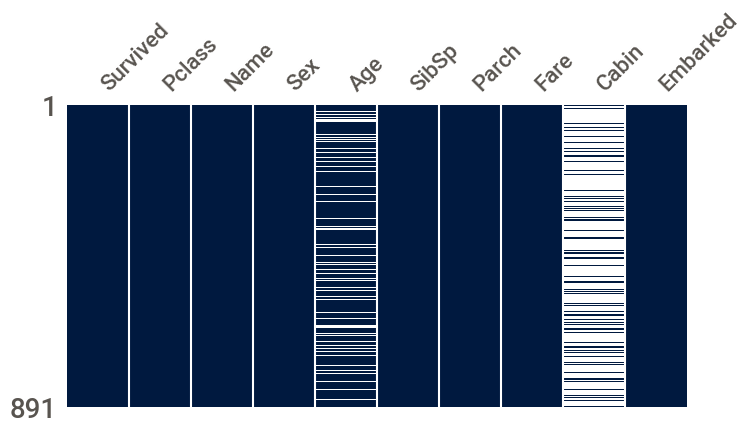

In [173]:
# Verificando graficamente
import missingno as missing
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

In [174]:
# Excluindo coluna por tem em média 77% de dados faltantes
dados.drop(['Cabin'], axis = 1, inplace = True)

In [175]:
dados.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [176]:
# Agrupando pela coluna 'Sex' pegando a média de idade para adicionar nos valores faltantes de Age
dados['Age'].fillna(round(dados.groupby(['Sex'])['Age'].transform('mean'),0),inplace=True)

In [177]:
dados.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [178]:
# Na verificação de valores faltantes acima é possivel perceber que tinha 2 dados faltantes em 'Embarked', através desse filtro foi possivel ver que esses 2 dados são de duas pessoas do sexo 'FEMININO'
woman = dados.loc[dados['Sex'] == 'female']
woman.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [179]:
# Comprovando que não tem valores faltantes em 'Embarked' nos registros masculinos
man = dados.loc[dados['Sex'] == 'male']
man.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [180]:
# Pegando a moda de 'Embarked' do sexo feminino
moda_emb_f = dados.loc[dados['Sex'] == 'female']
moda_emb = moda_emb_f['Embarked'].mode()[0]
moda_emb

'S'

In [181]:
# Atribuindo a moda de 'Embarked' nos valores nulos
dados['Embarked'] = dados['Embarked'].fillna(moda_emb)

In [182]:
# Conferindo os valores faltantes
dados.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [183]:
dados.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


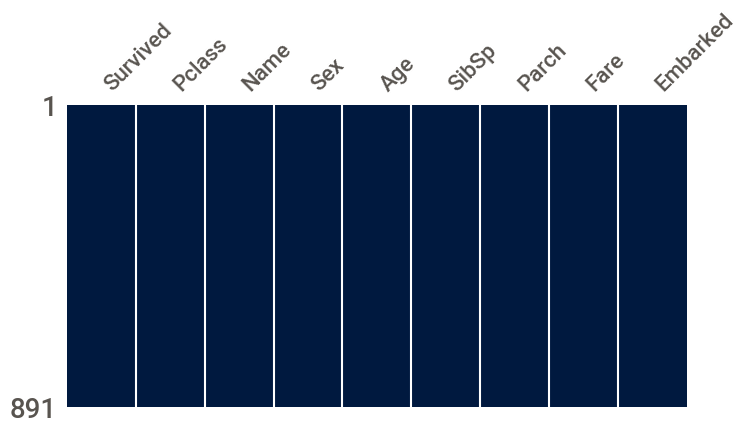

In [184]:
# Verificando graficamente
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

### **Remoção de Outliers**

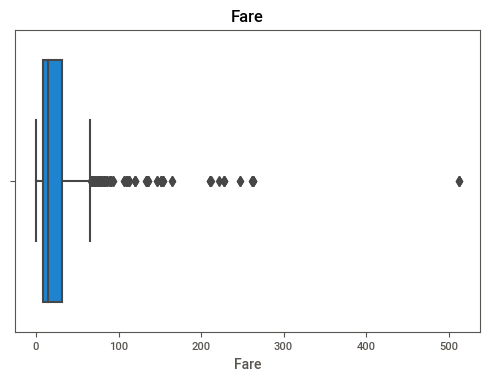

In [185]:
# Observando outliers em 'Fare'
srn.boxplot(x = dados['Fare']).set_title("Fare");

In [186]:
# Pegando todos os dados exceto os 2,5% maiores
top = dados['Fare'].quantile(0.975)
top

153.4625

In [187]:
# Atribuindo o valor na varial 'Fare'
dados.loc[dados['Fare'] > top, 'Fare'] = top


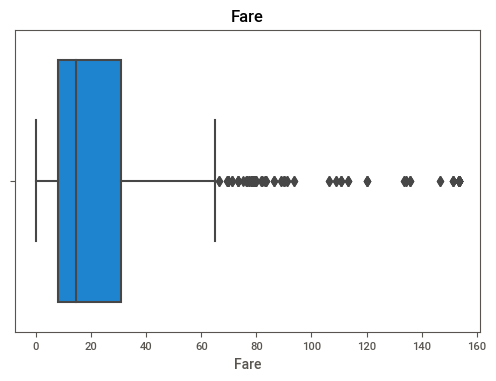

In [188]:
# Verificando
srn.boxplot(x = dados['Fare']).set_title("Fare");

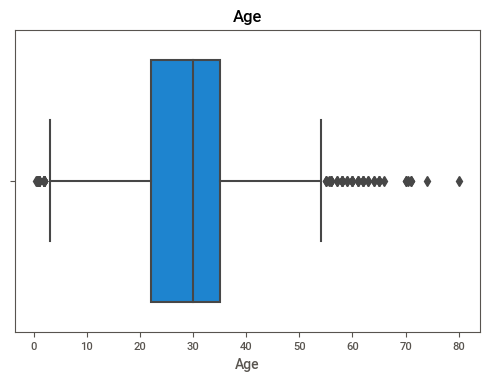

In [189]:
# Observando outliers em 'Age'
srn.boxplot(x = dados['Age']).set_title("Age");

### **Escala das Variáveis Contínuas**

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#opção 1 - Padronização
#dados[['Age', 'Fare']] = sc.fit_transform(dados[['Age', 'Fare']])

#opção 2 - Normalização
dados['Age'] = dados['Age']/100
dados['Fare'] = dados['Fare']/max(dados['Fare'])


In [191]:
dados.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,0.22,1,0,0.047243,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.38,1,0,0.464500,C
2,1,3,"Heikkinen, Miss. Laina",female,0.26,0,0,0.051641,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.35,1,0,0.346013,S
4,0,3,"Allen, Mr. William Henry",male,0.35,0,0,0.052456,S


### **Engenharia de Variáveis**

In [192]:
# tranformação de variável: pegar apenas o titulo presente no nome

def aux(x):
    return x.split(', ')[1].split('. ')[0]

dados['Titulo'] = dados['Name'].apply(aux)

dados.drop(['Name'], axis = 1, inplace = True)

dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulo
0,0,3,male,0.22,1,0,0.047243,S,Mr
1,1,1,female,0.38,1,0,0.464500,C,Mrs
2,1,3,female,0.26,0,0,0.051641,S,Miss
3,1,1,female,0.35,1,0,0.346013,S,Mrs
4,0,3,male,0.35,0,0,0.052456,S,Mr


In [193]:
# variável parch e sibsb
dados['Familia'] = dados['SibSp'] + dados['Parch'] + 1 

def aux(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

dados['FamiliaTipo'] = dados['Familia'].apply(aux) 

dados.drop(['Familia', 'Parch', 'SibSp'], axis = 1, inplace = True)

dados.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Titulo,FamiliaTipo
0,0,3,male,0.22,0.047243,S,Mr,Pequena
1,1,1,female,0.38,0.464500,C,Mrs,Pequena
2,1,3,female,0.26,0.051641,S,Miss,Sozinho
3,1,1,female,0.35,0.346013,S,Mrs,Pequena
4,0,3,male,0.35,0.052456,S,Mr,Sozinho


---
### **Agrupamento de Categorias**

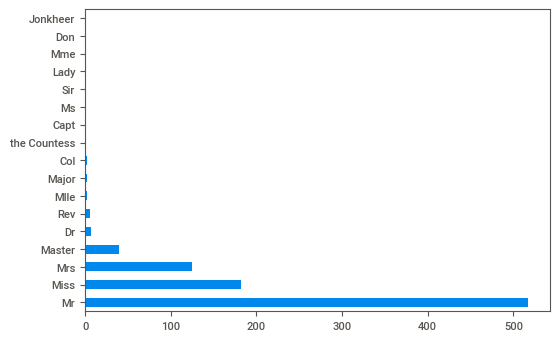

In [194]:
# Observando os dados
dados['Titulo'].value_counts().plot(kind = 'barh')

In [195]:
# Função para agrupar os dados
def aux(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Outros'

dados['Titulo'] = dados['Titulo'].apply(aux)
dados.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Titulo,FamiliaTipo
0,0,3,male,0.22,0.047243,S,Mr,Pequena
1,1,1,female,0.38,0.464500,C,Mrs,Pequena
2,1,3,female,0.26,0.051641,S,Miss,Sozinho
3,1,1,female,0.35,0.346013,S,Mrs,Pequena
4,0,3,male,0.35,0.052456,S,Mr,Sozinho


### **Dummyficação de Variáveis**

In [196]:
# Criando dammuyficações
variaveis_cat = ['Pclass', 'Sex', 'Embarked', 'Titulo', 'FamiliaTipo']

dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

dados.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0,0.22,0.047243,0,1,1,0,1,0,1,0,0,1,0
1,1,0.38,0.464500,0,0,0,0,0,0,0,1,0,1,0
2,1,0.26,0.051641,0,1,0,0,1,1,0,0,0,0,1
3,1,0.35,0.346013,0,0,0,0,1,0,0,1,0,1,0
4,0,0.35,0.052456,0,1,1,0,1,0,1,0,0,0,1


In [197]:
dados.isnull().sum()

Survived               0
Age                    0
Fare                   0
Pclass_2               0
Pclass_3               0
Sex_male               0
Embarked_Q             0
Embarked_S             0
Titulo_Miss            0
Titulo_Mr              0
Titulo_Mrs             0
Titulo_Outros          0
FamiliaTipo_Pequena    0
FamiliaTipo_Sozinho    0
dtype: int64

# **Machine Learning dados de treino**

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

In [199]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)


In [200]:
X = dados.drop('Survived', axis = 1)
y = dados['Survived']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=150, max_depth = 5),
                        RandomForestClassifier(n_estimators=150, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 150, prof = 5)', 
                        'Random Forest (arvs = 150, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)
Rodando modelo: Random Forest (arvs = 150, prof = 5)
Rodando modelo: Random Forest (arvs = 150, prof = 7)


In [201]:
# Verificando os melhores modelos ordenando pela acurácia
resultados.sort_values(by = 'acurácia', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
"Random Forest (arvs = 100, prof = 5)",0.834476,0.713613,0.832792,0.811739,0.766416
"Random Forest (arvs = 150, prof = 5)",0.832765,0.710504,0.835920,0.809747,0.763517
"Random Forest (arvs = 50, prof = 5)",0.832740,0.716261,0.829428,0.810773,0.766017
"Random Forest (arvs = 150, prof = 7)",0.831598,0.703109,0.836688,0.807354,0.762243
"Random Forest (arvs = 100, prof = 7)",0.829432,0.703445,0.829475,0.805729,0.757190
"Random Forest (arvs = 50, prof = 7)",0.828851,0.692899,0.838627,0.803217,0.754126
Árvore (prof = 3),0.825499,0.730966,0.800482,0.807646,0.762186
Regressão Logística,0.824363,0.733950,0.794057,0.807320,0.761387
Árvore (prof = 5),0.822079,0.721933,0.802038,0.803062,0.753502
15-NN,0.817609,0.711807,0.801422,0.797629,0.748936


# **Preparação dados de teste**

In [206]:
# Importando métricas
from sklearn.metrics import accuracy_score
# Importando dados de treinos
path = '/content/test (1).csv'
teste = pd.read_csv(path)
teste_original=teste.copy()
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [207]:
# Verificando a % de valores ausentes
teste.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [208]:
# Excluindo colunas que não serão utilizadas
teste.drop(['Ticket',	'Cabin', 'PassengerId'], axis = 1, inplace = True)

In [209]:
# Observando os dados
teste.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## **Remoção Outliers**

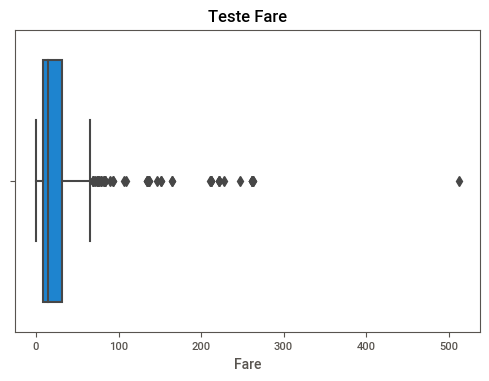

In [210]:
# Observando os outliers
srn.boxplot(x = teste['Fare']).set_title('Teste Fare');

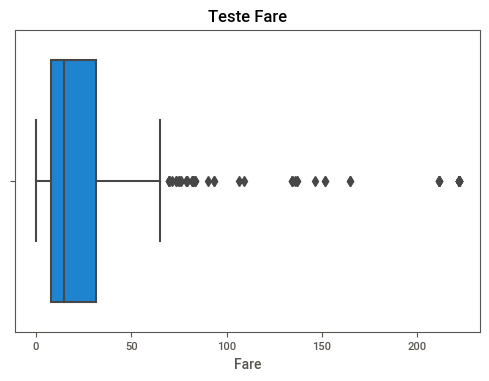

In [211]:
# Pegando todos os dados exceto os 2,5% maiores
maior = teste['Fare'].quantile(0.975)
# # Atribuindo o valor na variável 'Fare'
teste.loc[teste['Fare'] > maior, 'Fare'] = maior
srn.boxplot(x = teste['Fare']).set_title("Teste Fare");

## **Normalizando**

In [212]:
# Normalização
teste['Age'] = teste['Age']/100
teste['Fare'] = teste['Fare']/max(teste['Fare'])

In [213]:
teste.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,0.345,0,0,0.035302,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.470,1,0,0.031563,S
2,2,"Myles, Mr. Thomas Francis",male,0.620,0,0,0.043681,Q
3,3,"Wirz, Mr. Albert",male,0.270,0,0,0.039059,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.220,1,1,0.055404,S


## **Valores ausentes**

In [214]:
# Pegando apenas os dados em que o Sex é igual a male
var = teste.loc[teste['Sex'] == 'male']

In [215]:
# Verificando valores vazios apenas nos registros masculinos
var.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         61
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [216]:
# Pegando a média de 'Fare'
mean_fare = var['Fare'].mean()
mean_fare

0.12264365333067627

In [217]:
# Preenchendo o valor faltante
teste['Fare'] = teste['Fare'].fillna(mean_fare)

In [218]:
# Pegando a média de idade de cada sexo e preenchendo os valores ausentes
teste['Age'].fillna(round(teste.groupby(['Sex'])['Age'].transform('mean'),0),inplace=True)

In [219]:
# Verificando os dados 
teste.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

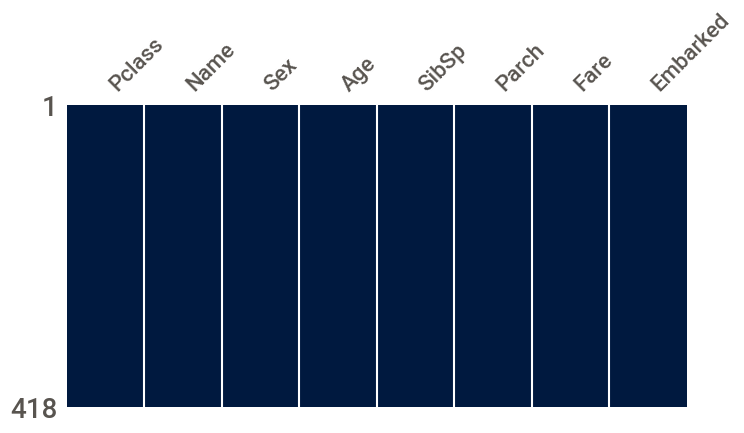

In [220]:
# Verificando graficamente
missing.matrix(teste, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

In [221]:
teste.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,0.345,0,0,0.035302,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.470,1,0,0.031563,S
2,2,"Myles, Mr. Thomas Francis",male,0.620,0,0,0.043681,Q
3,3,"Wirz, Mr. Albert",male,0.270,0,0,0.039059,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.220,1,1,0.055404,S


## **Engenharia de variaves**

In [222]:
# tranformação de variavel: pegar apenas o titulo presente no nome

def aux2(x):
    return x.split(', ')[1].split('. ')[0]

teste['Titulo'] = teste['Name'].apply(aux2)

teste.drop(['Name'], axis = 1, inplace = True)

teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulo
0,3,male,0.345,0,0,0.035302,Q,Mr
1,3,female,0.470,1,0,0.031563,S,Mrs
2,2,male,0.620,0,0,0.043681,Q,Mr
3,3,male,0.270,0,0,0.039059,S,Mr
4,3,female,0.220,1,1,0.055404,S,Mrs


In [223]:
# variavel parch e sibsb
teste['Familia'] = teste['SibSp'] + teste['Parch'] + 1 

def aux3(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

teste['FamiliaTipo'] = teste['Familia'].apply(aux3) 

teste.drop(['Familia', 'Parch', 'SibSp'], axis = 1, inplace = True)

teste.head()

,Pclass,Sex,Age,Fare,Embarked,Titulo,FamiliaTipo
0,3,male,0.345,0.035302,Q,Mr,Sozinho
1,3,female,0.470,0.031563,S,Mrs,Pequena
2,2,male,0.620,0.043681,Q,Mr,Sozinho
3,3,male,0.270,0.039059,S,Mr,Sozinho
4,3,female,0.220,0.055404,S,Mrs,Pequena


## **Agrupamento de categorias**

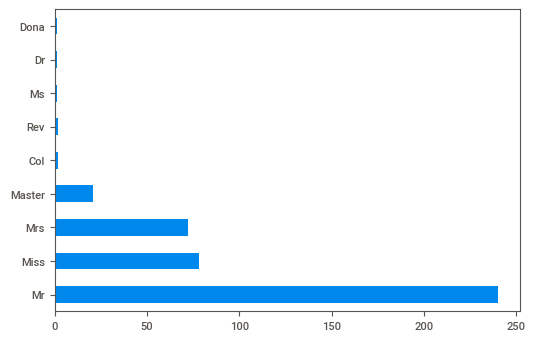

In [224]:
# Observando os dados
teste['Titulo'].value_counts().plot(kind = 'barh');

In [225]:
# Função para agrupar os dados
def aux4(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Outros'

teste['Titulo'] = teste['Titulo'].apply(aux4)
teste.head()

,Pclass,Sex,Age,Fare,Embarked,Titulo,FamiliaTipo
0,3,male,0.345,0.035302,Q,Mr,Sozinho
1,3,female,0.470,0.031563,S,Mrs,Pequena
2,2,male,0.620,0.043681,Q,Mr,Sozinho
3,3,male,0.270,0.039059,S,Mr,Sozinho
4,3,female,0.220,0.055404,S,Mrs,Pequena


## **Dammuyficações**

In [226]:
# Criando dammuyficações nos dados de teste
teste_cat = ['Pclass', 'Sex', 'Embarked', 'Titulo', 'FamiliaTipo']

teste = pd.get_dummies(teste, columns = teste_cat, drop_first = True)

teste.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0.345,0.035302,0,1,1,1,0,0,1,0,0,0,1
1,0.470,0.031563,0,1,0,0,1,0,0,1,0,1,0
2,0.620,0.043681,1,0,1,1,0,0,1,0,0,0,1
3,0.270,0.039059,0,1,1,0,1,0,1,0,0,0,1
4,0.220,0.055404,0,1,0,0,1,0,0,1,0,1,0


# **Machine Learning dados de teste**

In [227]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25)

In [228]:
# Criando o modelo
modelo = RandomForestClassifier(n_estimators=100, max_depth = 5)

In [229]:
# Treinando o modelo
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=5)

In [230]:
# Fazendo as predições
pred_teste = modelo.predict(teste)

In [231]:
# Predições 
pred_teste

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [143]:
# Criando um DF com os resultados finais
submissao = pd.DataFrame(pred_teste, columns = ['Survived'])
submissao = pd.concat([teste_original['PassengerId'], submissao], axis = 1)

In [144]:
submissao.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [145]:
# Transformando o arquivo em CSV e baixando
from google.colab import files
submissao.to_csv('submissao3.csv',index=False)
files.download('submissao3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>